In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes = True)

In [9]:
df = pd.read_csv('https://query.data.world/s/srgmggc27wsevjcgo3idzko6scwls3')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


#### Distinguised attributes

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [10]:
# Fix dtypes

df['User_Score'].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
1.1       2
2.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [15]:
df['User_Score'] = df['User_Score'].replace({'tbd': -1}).astype(float)

In [16]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [17]:
df['User_Score'].value_counts()

-1.0    2425
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.1       2
 2.3       2
 1.5       2
 0.0       1
 9.7       1
Name: User_Score, Length: 96, dtype: int64

In [19]:
df.shape

(16719, 16)

In [24]:
df.isna().sum()/df.shape[0]*100

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

<AxesSubplot:>

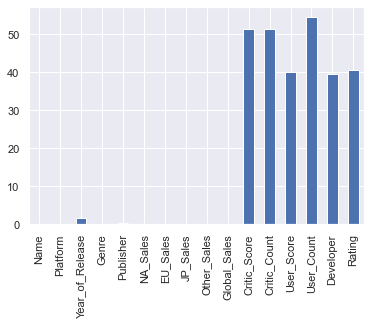

In [29]:
(df.isna().sum()/df.shape[0]*100).plot(kind='bar')

In [30]:
import missingno as msno

#### Visualize missting value matrix

<AxesSubplot:>

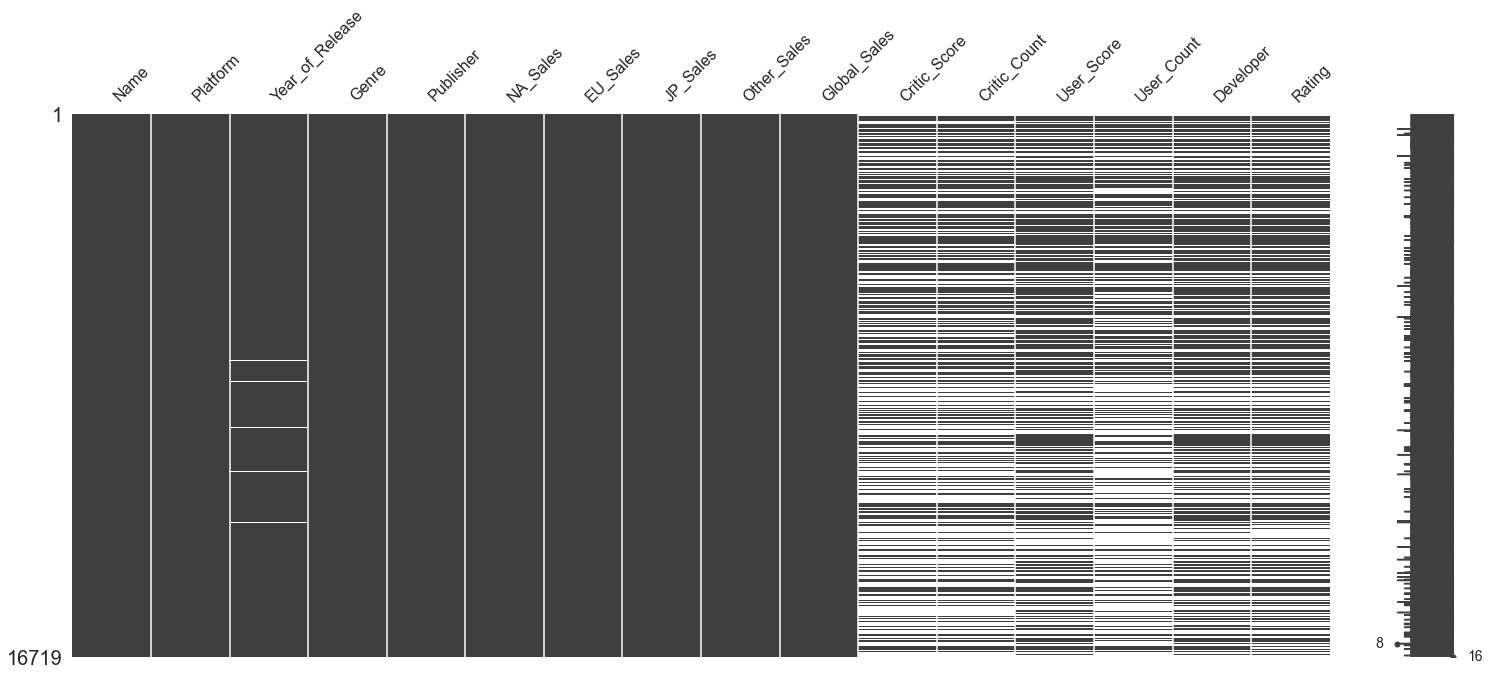

In [31]:
msno.matrix(df)

<AxesSubplot:>

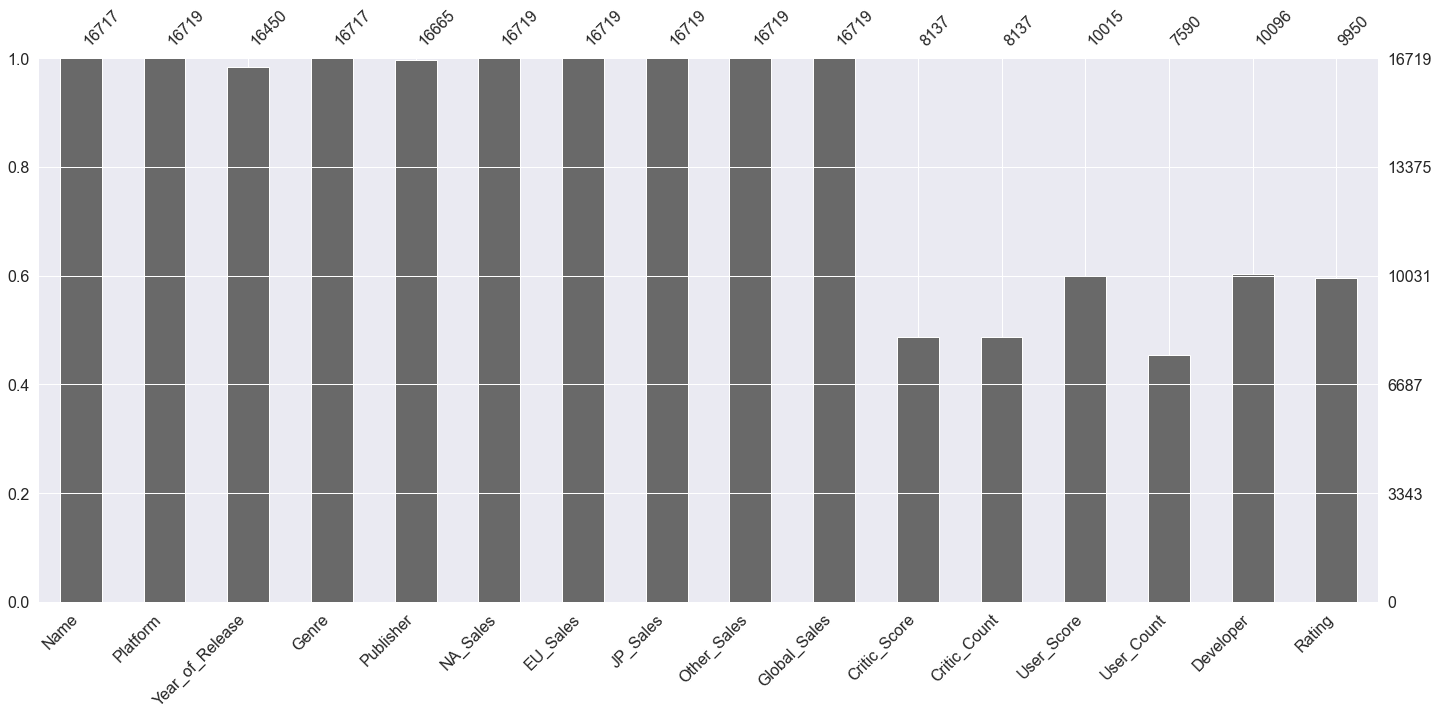

In [32]:
msno.bar(df)

###### Visualize the correlation between the number of missing values in different columns as a heatmap

- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

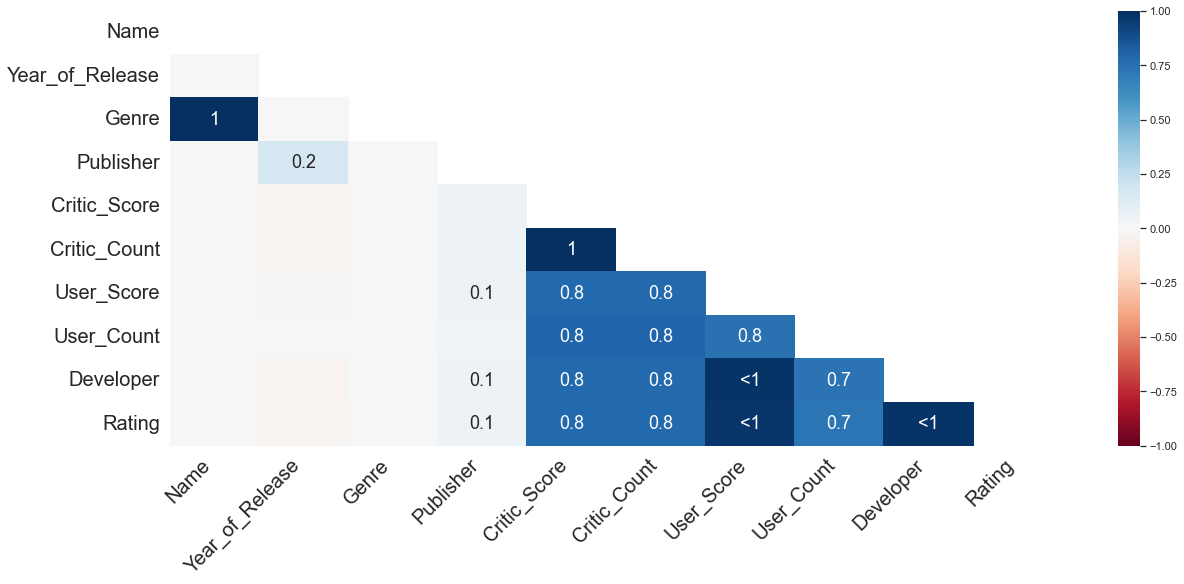

In [37]:
msno.heatmap(df, figsize=(20, 8), fontsize = 20)

In [38]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,5.157673,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,3.717634,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,2.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,6.900000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


![title](https://sigmamagic.com/blogs/images/quartiles.jpg)

![title](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

In [46]:
min_val = df.describe().loc['min']
max_val = df.describe().loc['max']

# max_val - min_val
range_val = max_val - min_val
range_val

Year_of_Release       40.00
NA_Sales              41.36
EU_Sales              28.96
JP_Sales              10.22
Other_Sales           10.57
Global_Sales          82.52
Critic_Score          85.00
Critic_Count         110.00
User_Score            10.70
User_Count         10661.00
dtype: float64

#### Quartile Deviation

In [49]:
q1 = df.describe().loc['25%']
q3 = df.describe().loc['75%']

InterQuartile_deviation = (q3 - q1)
InterQuartile_deviation

Year_of_Release     7.00
NA_Sales            0.24
EU_Sales            0.11
JP_Sales            0.04
Other_Sales         0.03
Global_Sales        0.41
Critic_Score       19.00
Critic_Count       24.00
User_Score          5.60
User_Count         71.00
dtype: float64

# Univariate Analysis

In [50]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:>

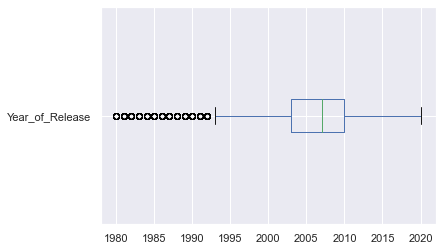

In [52]:
df['Year_of_Release'].plot(kind='box', vert=False )

Skewness & Kurtosis

![title](https://devopedia.org/images/article/75/5652.1523703926.jpg)

* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the central point.

* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [53]:
df.skew()

Year_of_Release    -0.973151
NA_Sales           18.773790
EU_Sales           18.852939
JP_Sales           11.208769
Other_Sales        24.586283
Global_Sales       17.377990
Critic_Score       -0.613646
Critic_Count        1.155125
User_Score         -0.854818
User_Count          9.033249
dtype: float64

<AxesSubplot:ylabel='Frequency'>

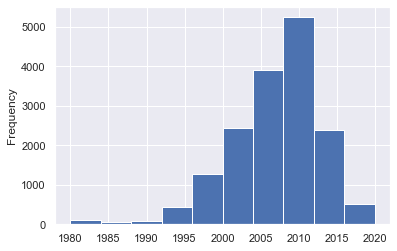

In [59]:
df['Year_of_Release'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

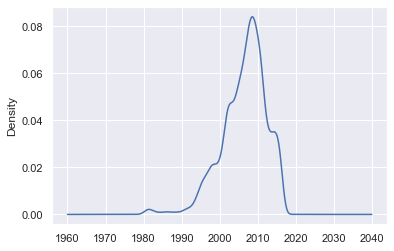

In [56]:
df['Year_of_Release'].plot(kind='kde')

* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

![title](https://miro.medium.com/max/519/1*bcg1TOIa6uFVeVe7eWSqGQ.png)

In [58]:
df.kurt()

Year_of_Release       1.771294
NA_Sales            648.701210
EU_Sales            755.672941
JP_Sales            194.311548
Other_Sales        1055.127703
Global_Sales        604.098261
Critic_Score          0.142851
Critic_Count          1.031811
User_Score           -0.947640
User_Count          112.519193
dtype: float64

<AxesSubplot:ylabel='Density'>

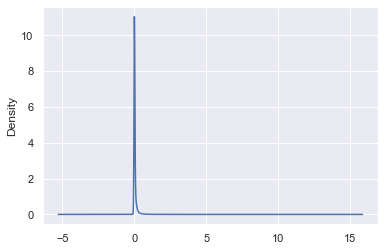

In [60]:
df['Other_Sales'].plot(kind='kde')

# Bi-variate analysis

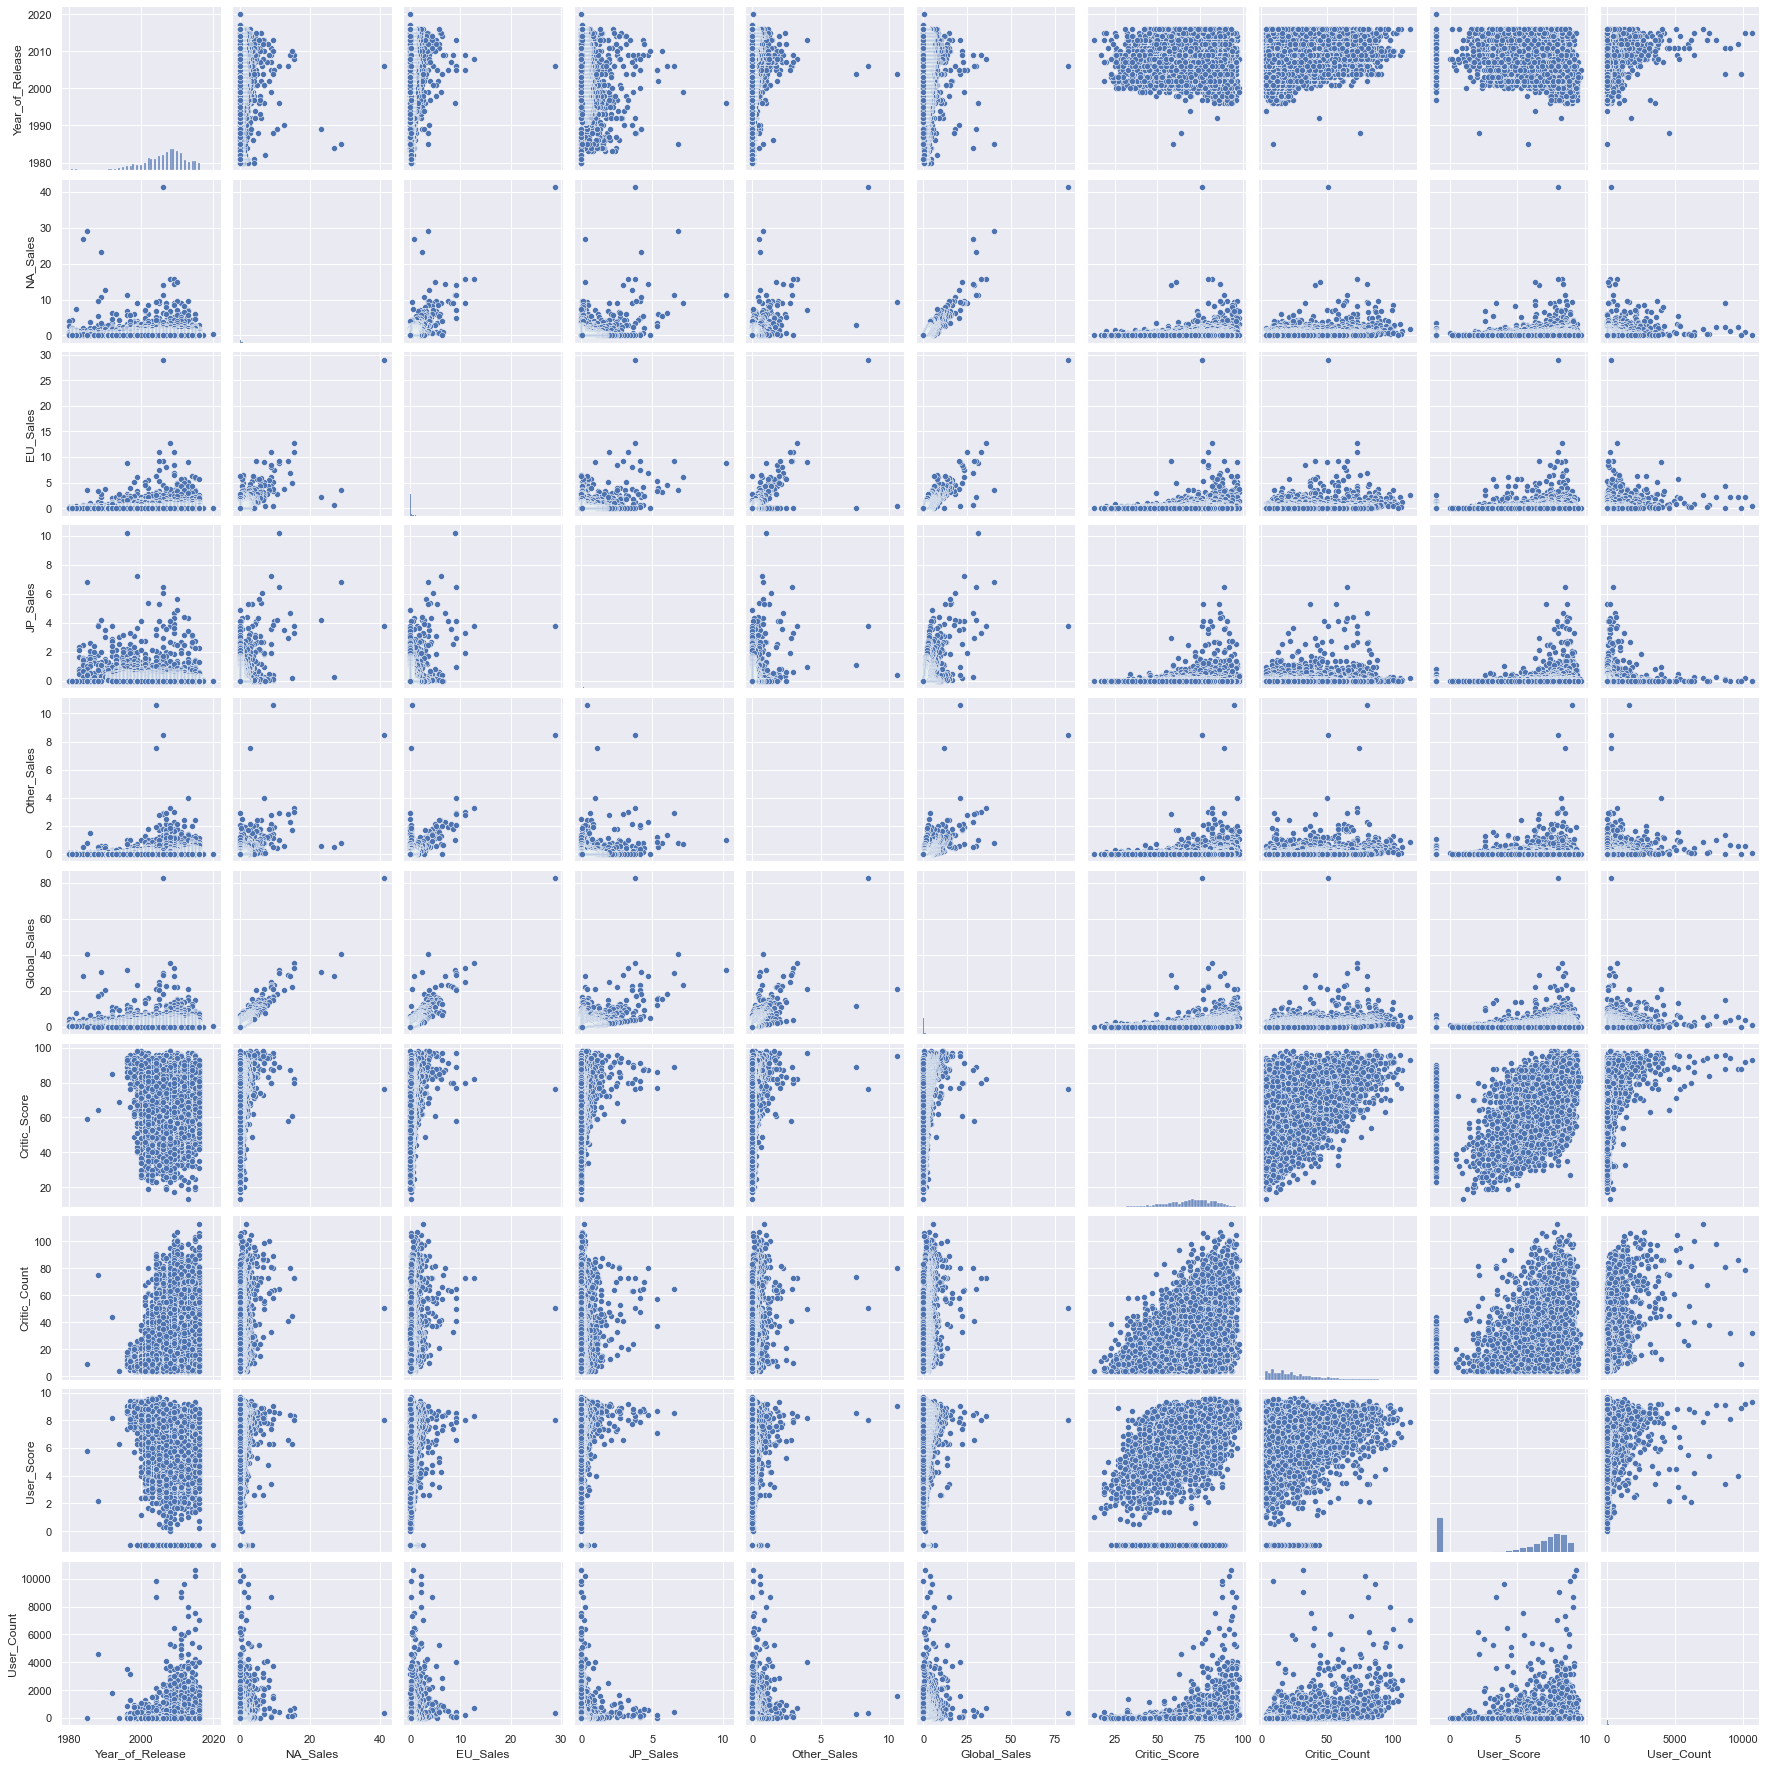

In [62]:
sns.pairplot(df)

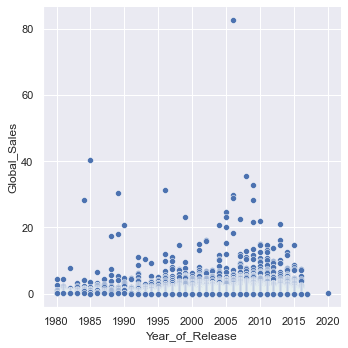

In [66]:
sns.relplot(x = 'Year_of_Release', y = 'Global_Sales', data = df)

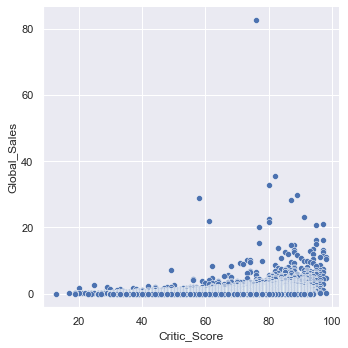

In [68]:
sns.relplot(x = 'Critic_Score', y = 'Global_Sales', data = df)

In [86]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [102]:
df_col = df[['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']]

In [103]:
df_col.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.063030,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.152283,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.144445,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.138005,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.131837,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.163900,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.443590,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.363371,0.362334
User_Score,-0.063030,0.152283,0.144445,0.138005,0.131837,0.163900,0.443590,0.363371,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


<AxesSubplot:>

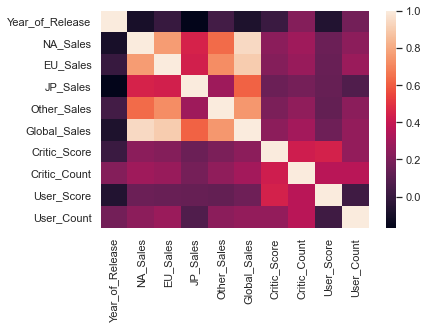

In [104]:
corr_mat = df_col.corr()
sns.heatmap(corr_mat) ##cmap = 'Set1', annot = TruE

In [105]:
from sklearn.impute import KNNImputer

In [106]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric = 'nan_euclidean')

In [108]:
imputer.fit(df_col)

KNNImputer()

In [109]:
df_col.isna().sum()

Year_of_Release     269
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
dtype: int64

In [112]:
xtrans = imputer.transform(df_col)
imputed_df = pd.DataFrame(xtrans, columns = df_col.columns)

In [113]:
imputed_df.isna().sum()

Year_of_Release    0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

![title](https://i.stack.imgur.com/nVvnQ.png)

In [114]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,5.157673,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,3.717634,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,2.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,6.900000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [116]:
df_mean = df.describe().loc['mean']

df_std = df.describe().loc['std']

In [118]:
upper_lim = (df_mean + df_std*3)
lower_lim = (df_mean - df_std*3)

In [127]:
for col in df_std.index:
    df[col].iloc[df[col] >upper_lim.loc[col]] = upper_lim.loc[col]
    df[col].iloc[df[col] <lower_lim.loc[col]] = lower_lim.loc[col]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [128]:
### Automatic Outlier detection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

In [129]:
x_train, x_test = train_test_split(imputed_df, test_size = 0.25, random_state = 1)

In [130]:
lof =  LocalOutlierFactor()

In [131]:
yhat = lof.fit_predict(x_train)

In [132]:
pd.Series(yhat).value_counts()

 1    11874
-1      665
dtype: int64

In [133]:
imputed_df.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,79.2,66.4,7.96,411.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,81.4,64.6,8.08,465.4


<AxesSubplot:>

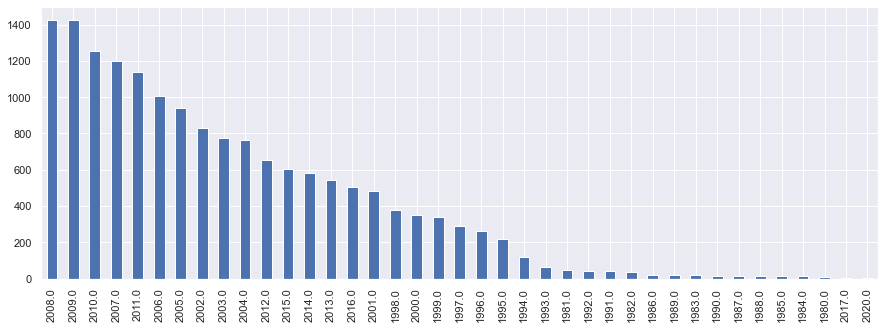

In [139]:
df.Year_of_Release.value_counts().plot(kind='bar', figsize = (15,5))

<AxesSubplot:>

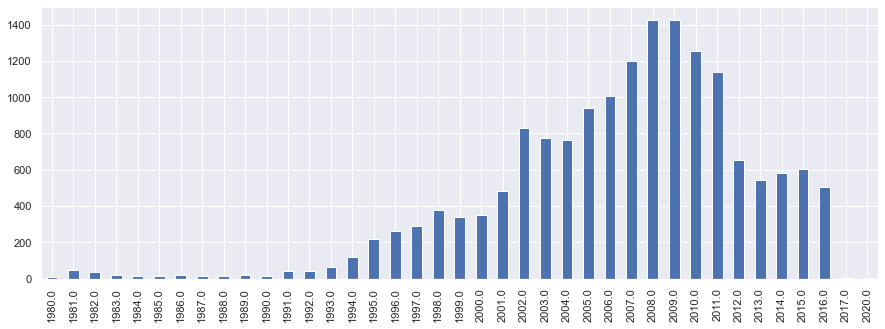

In [141]:
df.Year_of_Release.value_counts().sort_index().plot(kind='bar', figsize = (15,5))